In [68]:
import matplotlib.pyplot as plt
import numpy as np

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

In [155]:
# Measured with a meter stick, unceratinly 0.5 mm
solenoidLength = 389 # mm

# Measured with a vernier calipers, uncertainty 0.05 mm
# Note: External Diameter
solenoidDiameter = 44 # mm

solenoidTurns = 900 # assummed based on comparing calculations with paper values
cylinderTurns = 100
cylinderRadius = 9.6 /2 # mm

# Copper

In [110]:
cData01 = np.loadtxt("copperData200922.txt", skiprows=1)
copperFrequency = np.array(cData01[:,0])
copperVoltage = np.array(cData01[:,1])*10**-3

In [111]:
c_vOverF = list()

i = 0
while i<len(copperVoltage):
    c_vOverF.append(copperVoltage[i] / copperFrequency[i])
    i+=1

c_inverseF = [1/np.sqrt(el) for el in copperFrequency]

### Curvefit

In [117]:
# Only taking the linear componenet of the data, as the higher frequencies divert from the expected results

cop_pars, cop_cov = np.polyfit(c_inverseF[14:], c_vOverF[14:], 1, cov=True)

def cop_fitting(x):
    return cop_pars[0]*x + cop_pars[1]

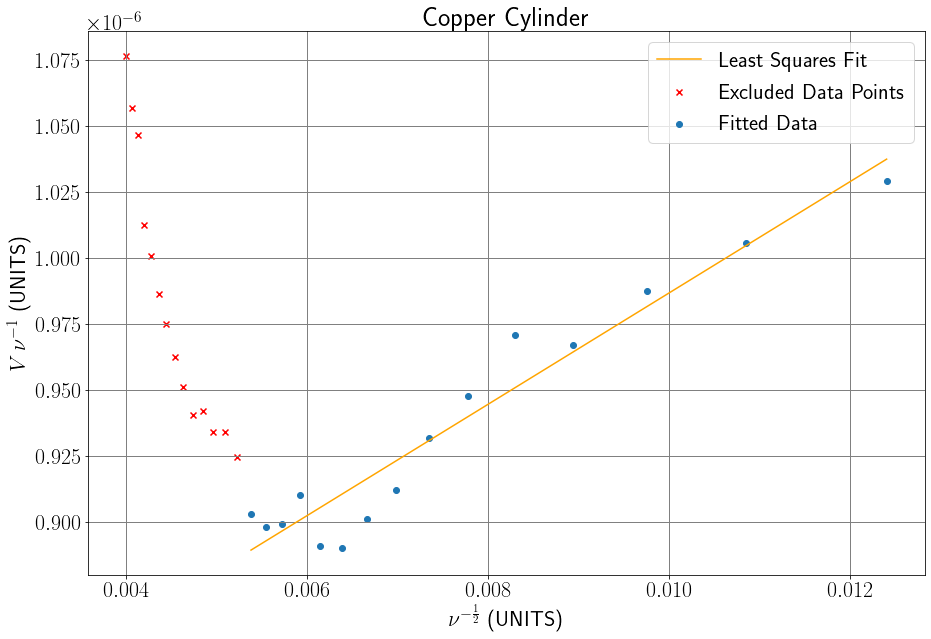

In [121]:
cop_xRange = np.linspace(c_inverseF[14], c_inverseF[-1], 100)

plt.scatter(c_inverseF[:14], c_vOverF[:14], color="red", marker="x", label="Excluded Data Points") # Outliers
plt.scatter(c_inverseF[14:], c_vOverF[14:], label="Fitted Data") # Fitted points
plt.plot(cop_xRange, cop_fitting(cop_xRange), color="orange", label="Least Squares Fit")

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xlabel(r"$\nu^{-\frac{1}{2}}$ (UNITS)")
plt.ylabel(r"$V\,\nu^{-1}$ (UNITS)")
plt.title("Copper Cylinder")
plt.legend()

### Conductivity

In [162]:
def conductivity(m):
    N1= solenoidTurns
    N2= 100
    mu= 1.257e-6
    I= 19e-3
    R= cylinderRadius * 10**-3
    L= solenoidLength * 10**-3
    
    return 8 * np.pi**3 * N1**2 * N2**2 * mu * I**2 * R**2 / (m**2 * L**2)

In [163]:
print(f"Conductivity of Copper: {conductivity(cop_pars[0])}")

Conductivity of Copper: 312006430.12491184


# Aluminium

In [164]:
aData01 = np.loadtxt("aluminiumData200922.txt", skiprows=1)
aluFrequency = np.array(aData01[:,0])
aluVoltage = np.array(aData01[:,1])* 10**-3

In [165]:
a_vOverF = list()

i = 0
while i<len(aluVoltage):
    a_vOverF.append(aluVoltage[i] / aluFrequency[i])
    i+=1

a_inverseF = [1/np.sqrt(el) for el in aluFrequency]

### Curvefit

In [166]:
# Only taking the linear componenet of the data, as the higher frequencies divert from the expected results

alu_pars, alu_cov = np.polyfit(a_inverseF[10:], a_vOverF[10:], 1, cov=True)

def alu_fitting(x):
    return alu_pars[0]*x + alu_pars[1]

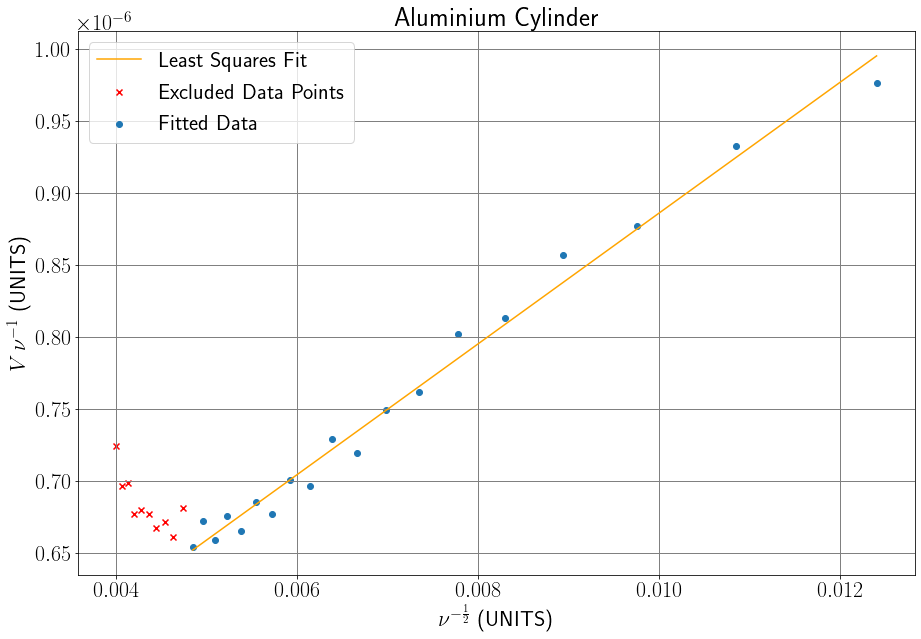

In [167]:
alu_xRange = np.linspace(a_inverseF[10], a_inverseF[-1], 100)

plt.scatter(a_inverseF[:10], a_vOverF[:10], color="red", marker="x", label="Excluded Data Points") # Outliers
plt.scatter(a_inverseF[10:], a_vOverF[10:], label="Fitted Data") # Fitted points
plt.plot(alu_xRange, alu_fitting(alu_xRange), color="orange", label="Least Squares Fit")

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xlabel(r"$\nu^{-\frac{1}{2}}$ (UNITS)")
plt.ylabel(r"$V\,\nu^{-1}$ (UNITS)")
plt.title("Aluminium Cylinder")
plt.legend()

In [168]:
print(alu_pars[0])
print(f"Conductivity of Aluminium: {conductivity(alu_pars[0])}")

4.549736661479407e-05
Conductivity of Aluminium: 67062208.993731394


# Brass

In [169]:
bData01 = np.loadtxt("brassData200922.txt", skiprows=1)
braFrequency = np.array(bData01[:,0])
braVoltage = np.array(bData01[:,1])* 10**-3

In [170]:
b_vOverF = list()

i = 0
while i<len(braVoltage):
    b_vOverF.append(braVoltage[i] / braFrequency[i])
    i+=1

b_inverseF = [1/np.sqrt(el) for el in braFrequency]

### Curvefit

In [171]:
# Only taking the linear componenet of the data, as the higher frequencies divert from the expected results

bra_pars, bra_cov = np.polyfit(b_inverseF[10:], b_vOverF[10:], 1, cov=True)

def bra_fitting(x):
    return bra_pars[0]*x + bra_pars[1]

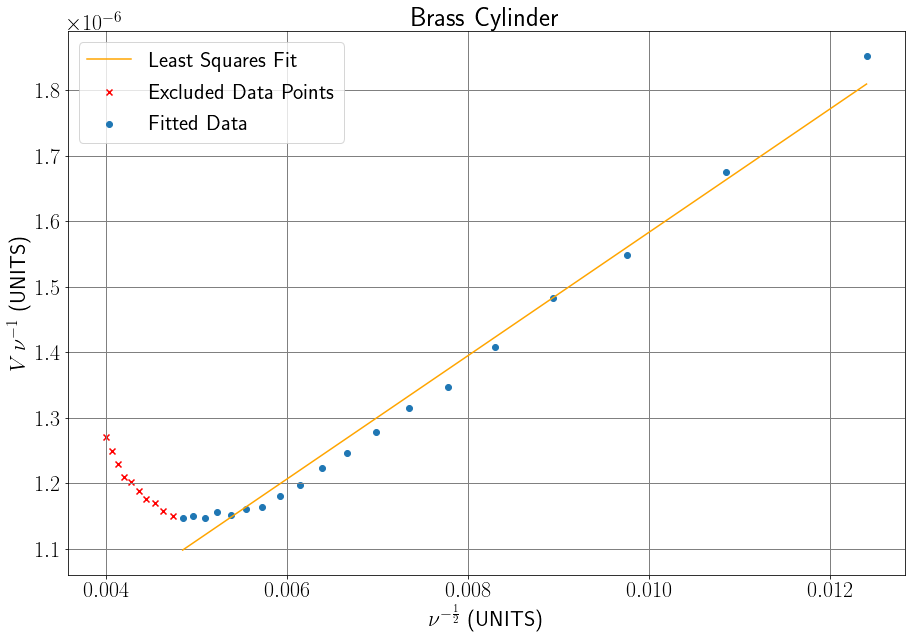

In [172]:
bra_xRange = np.linspace(b_inverseF[10], b_inverseF[-1], 100)

plt.scatter(b_inverseF[:10], b_vOverF[:10], color="red", marker="x", label="Excluded Data Points") # Outliers
plt.scatter(b_inverseF[10:], b_vOverF[10:], label="Fitted Data") # Fitted points
plt.plot(bra_xRange, bra_fitting(bra_xRange), color="orange", label="Least Squares Fit")

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xlabel(r"$\nu^{-\frac{1}{2}}$ (UNITS)")
plt.ylabel(r"$V\,\nu^{-1}$ (UNITS)")
plt.title("Brass Cylinder")
plt.legend()

In [173]:
print(bra_pars[0])
print(f"Conductivity of Brass: {conductivity(bra_pars[0])}")

9.413877158047732e-05
Conductivity of Brass: 15664384.032309093


# Steel

In [174]:
sData01 = np.loadtxt("steelData210922.txt", skiprows=1)
steFrequency = np.array(sData01[:,0])
steVoltage = np.array(sData01[:,1])* 10**-3

In [175]:
s_vOverF = list()

i = 0
while i<len(steVoltage):
    s_vOverF.append(steVoltage[i] / steFrequency[i])
    i+=1

s_inverseF = [1/np.sqrt(el) for el in steFrequency]

### Curvefit

In [176]:
# Only taking the linear componenet of the data, as the higher frequencies divert from the expected results

ste_pars, ste_cov = np.polyfit(s_inverseF[5:], s_vOverF[5:], 1, cov=True)

def ste_fitting(x):
    return ste_pars[0]*x + ste_pars[1]

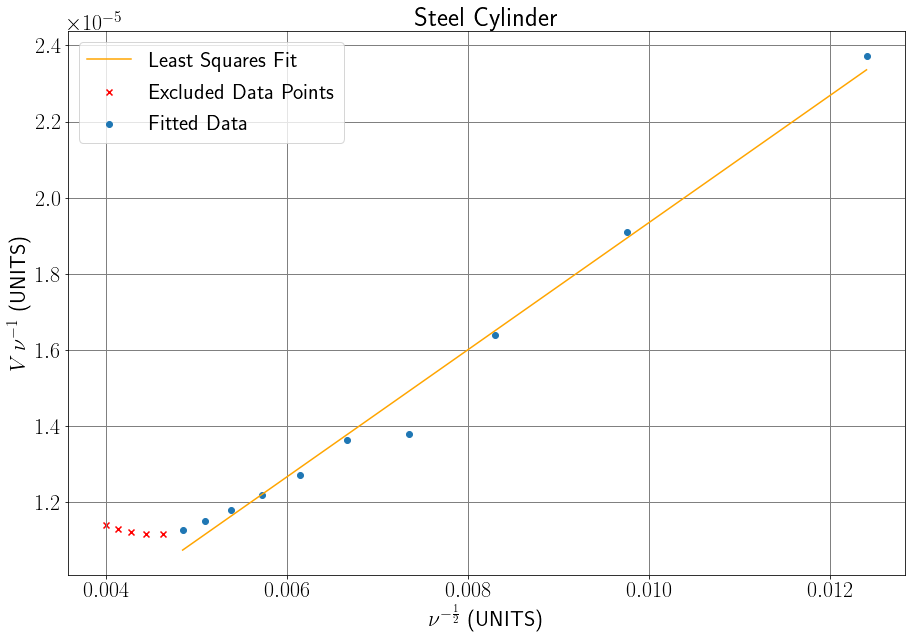

In [177]:
ste_xRange = np.linspace(s_inverseF[5], s_inverseF[-1], 100)

plt.scatter(s_inverseF[:5], s_vOverF[:5], color="red", marker="x", label="Excluded Data Points") # Outliers
plt.scatter(s_inverseF[5:], s_vOverF[5:], label="Fitted Data") # Fitted points
plt.plot(ste_xRange, ste_fitting(ste_xRange), color="orange", label="Least Squares Fit")

plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xlabel(r"$\nu^{-\frac{1}{2}}$ (UNITS)")
plt.ylabel(r"$V\,\nu^{-1}$ (UNITS)")
plt.title("Steel Cylinder")
plt.legend()

In [178]:
print(ste_pars[0])
print(f"Conductivity of Steel: {conductivity(ste_pars[0])}")

0.0016705738355486117
Conductivity of Steel: 49741.516896522866
